선언부

In [1]:
import pandas as pd
import warnings
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

데이터 불러오기

In [2]:
iris = datasets.load_iris()

print(type(iris))

labels = pd.DataFrame(iris.target)
labels.columns = ['labels']
data = pd.DataFrame(iris.data)
data.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
data = pd.concat([data, labels], axis=1)

<class 'sklearn.utils.Bunch'>


데이터의 분리

In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

파라미터 지정하기
n_neighbors, weights, metric 키와 밸류 설정한 딕셔너리 선언

In [4]:
grid_params = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [5]:
gs = GridSearchCV(
    KNeighborsClassifier(), #estimator
    grid_params, # 찾고자하는 파라미터, 위에서 딕셔너리 선언
    verbose = 1, # verbose : integer    Controls the verbosity: the higher, the more messages. 뭔말이지?
    cv = 3, # k fold c-v 에서 k값?
    n_jobs = -1 # 병렬 처리갯수 (-1은 전부)
    )

In [6]:
gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  48 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.0s finished
/home/minjoon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [7]:
print("Best Parameter: {}".format(gs.best_params_)) #가장 잘나오는 파라미터들을 출력

Best Parameter: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [8]:
print("Best Cross-validity Score: {:.3f}".format(gs.best_score_)) #최종 스코어

Best Cross-validity Score: 0.955


In [9]:
print("Test set Score: {:.3f}".format(gs.score(X_test, y_test)))

Test set Score: 1.000


여기서부턴 최적의 n_neighbors 찾기
위와같이 파라미터설정, gridsearchCV 선언 후 fit 실행

In [10]:
grid_params_for_n = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
gs_n = GridSearchCV(
    KNeighborsClassifier(),
    grid_params_for_n,
    cv = 5,
    return_train_score=True # 이게 디폴트가 false 던데 If ``False``, the ``cv_results_`` attribute will not include training scores. True로 한다는거는 cv 결과 속성이 트레이닝 스코어를 포함하게한다?
)
gs_n.fit(X_train, y_train)

/home/minjoon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [11]:
print("Best Parameter: {}".format(gs_n.best_params_))

Best Parameter: {'n_neighbors': 4}


In [12]:
print("Best Cross-validity Score: {:.3f}".format(gs_n.best_score_))

Best Cross-validity Score: 0.955


In [13]:
print("Test set Score: {:.3f}".format(gs_n.score(X_test, y_test)))

Test set Score: 1.000


In [14]:
result_grid = pd.DataFrame(gs_n.cv_results_)
print(result_grid) #결과 뽑아보기

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001330      0.000142         0.001575        0.000200   
1       0.001234      0.000067         0.001529        0.000065   
2       0.001215      0.000042         0.001478        0.000051   
3       0.001181      0.000014         0.001466        0.000015   
4       0.001181      0.000016         0.001479        0.000038   
5       0.001210      0.000038         0.001497        0.000050   
6       0.001153      0.000035         0.001478        0.000061   
7       0.001171      0.000026         0.001504        0.000027   
8       0.001165      0.000043         0.001456        0.000040   
9       0.001186      0.000029         0.001482        0.000032   

  param_n_neighbors               params  split0_test_score  \
0                 1   {'n_neighbors': 1}           0.956522   
1                 2   {'n_neighbors': 2}           0.913043   
2                 3   {'n_neighbors': 3}           0.913043   
3         

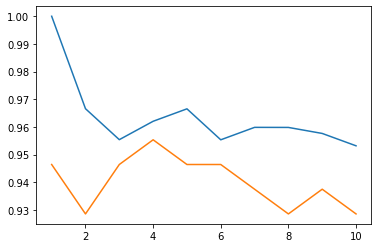

In [15]:
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.show() #n에 따른 점수결과 확인해보기